In [1]:
# model.predict_proba()
#gives raw probabilities for each class

#[:,3]
#it slices the second cloumn

#accuracy
# balanced data aim for 80%asa a descent modle

#recall
#precision
#F1 score-balances precison and recall(harmonic mean)

In [2]:
# 1. Load the dataset and inspect its structure (shape, columns, datatypes, first 5 rows).
import pandas as pd
import numpy as np

df=pd.read_csv("train.csv")

In [3]:
df.shape

(614, 13)

In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# 2. Perform data cleaning: handle missing values, encode categorical variables, drop irrelevant features.
df.isnull

<bound method DataFrame.isnull of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849        

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.dropna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df=df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0],inplace=True)

In [12]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [13]:
# Encode categorical variable
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])       
df['Married'] = le.fit_transform(df['Married']) 
df['Dependents'] = le.fit_transform(df['Dependents']) 
df['Education'] = le.fit_transform(df['Education']) 
df['Self_Employed'] = le.fit_transform(df['Self_Employed']) 
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])     
df['Property_Area'] = le.fit_transform(df['Property_Area'])

In [28]:
df.head()
df.dtypes

Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [15]:
#drop irrelevant features
df = df.drop(['Loan_ID'], axis=1)

In [16]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [17]:
# 3. Perform Exploratory Data Analysis (EDA): summary statistics, countplots/histograms, correlation heatmap.
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.842199,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


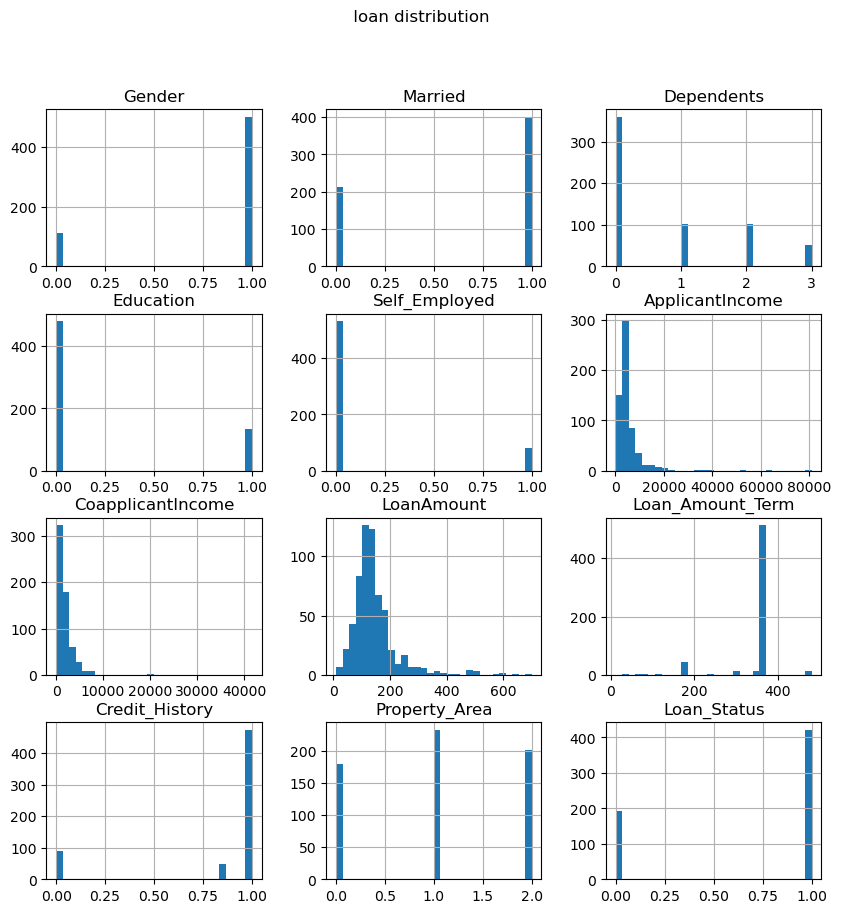

In [18]:
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(10,10))
plt.suptitle(" loan distribution ")
plt.show()

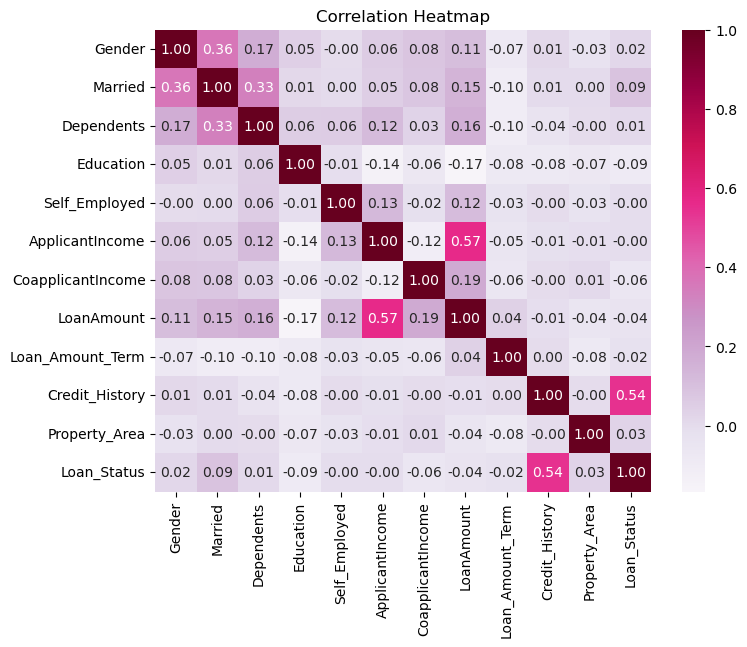

In [19]:
import seaborn as sns
num_df = df.select_dtypes(include=['number'])
corr = num_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="PuRd", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [20]:
# 4. Define the target variable (Loan_Status) and independent variables.
X = df.drop(['Loan_Status'], axis=1)
print(X)

     Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0           0          0              0             5849   
1         1        1           1          0              0             4583   
2         1        1           0          0              1             3000   
3         1        1           0          1              0             2583   
4         1        0           0          0              0             6000   
..      ...      ...         ...        ...            ...              ...   
609       0        0           0          0              0             2900   
610       1        1           3          0              0             4106   
611       1        1           1          0              0             8072   
612       1        1           2          0              0             7583   
613       0        0           0          0              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Ter

In [21]:
y = df['Loan_Status']
print(y)

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32


In [22]:
# 5. Split the dataset into training (70%) and testing (30%) sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [23]:
X_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
83,1,1,0,0,0,6000,2250.0,265.000000,360.0,0.842199,1
90,1,1,0,0,0,2958,2900.0,131.000000,360.0,1.000000,1
227,1,1,2,0,0,6250,1695.0,210.000000,360.0,1.000000,1
482,1,1,0,0,0,2083,3150.0,128.000000,360.0,1.000000,1
464,1,0,0,0,0,4166,0.0,98.000000,360.0,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
71,1,1,2,1,1,1875,1875.0,97.000000,360.0,1.000000,1
106,1,1,2,0,0,11417,1126.0,225.000000,360.0,1.000000,2
270,0,0,0,0,0,3237,0.0,30.000000,360.0,1.000000,2
435,0,1,0,0,0,10047,0.0,146.412162,240.0,1.000000,1


In [24]:
y_train

83     0
90     1
227    1
482    1
464    0
      ..
71     1
106    1
270    1
435    1
102    1
Name: Loan_Status, Length: 491, dtype: int32

In [25]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
350,1,1,0,0,0,9083,0.0,228.0,360.0,1.000000,1
377,1,1,0,0,0,4310,0.0,130.0,360.0,0.842199,1
163,1,1,2,0,0,4167,1447.0,158.0,360.0,1.000000,0
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.000000,0
132,1,0,0,0,0,2718,0.0,70.0,360.0,1.000000,1
...,...,...,...,...,...,...,...,...,...,...,...
231,1,1,0,0,0,3716,0.0,42.0,180.0,1.000000,0
312,0,0,0,0,0,2507,0.0,56.0,360.0,1.000000,0
248,1,1,1,0,0,2882,1843.0,123.0,480.0,1.000000,1
11,1,1,2,0,0,2500,1840.0,109.0,360.0,1.000000,2


In [26]:
y_test

350    1
377    1
163    1
609    1
132    1
      ..
231    1
312    1
248    1
11     1
333    1
Name: Loan_Status, Length: 123, dtype: int32

In [33]:
# 6. Train a Logistic Regression model on the training set.

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [34]:
# 7. Make predictions on the test set.

y_pred = model.predict(X_test)

In [35]:
# 8. Evaluate the model using Accuracy, Precision, Recall, F1 Score, and Confusion Matrix.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8486486486486486
Precision: 0.8322147651006712
Recall: 0.9763779527559056
F1 Score: 0.8985507246376812

Confusion Matrix:
 [[ 33  25]
 [  3 124]]


In [38]:
# 9. Interpret coefficients: which features influence loan approval most strongly?

coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0] })

coef_df = coef_df.reindex(coef_df.Coefficient.abs().sort_values(ascending=False).index)

print("Features influencing Loan Approval (strongest to weakest):\n")
print(coef_df)

Features influencing Loan Approval (strongest to weakest):

              Feature  Coefficient
9      Credit_History     2.703596
3           Education    -0.768168
1             Married     0.384932
4       Self_Employed    -0.181722
2          Dependents     0.122515
10      Property_Area     0.098496
0              Gender    -0.083748
8    Loan_Amount_Term    -0.003885
7          LoanAmount    -0.000807
6   CoapplicantIncome    -0.000053
5     ApplicantIncome    -0.000007
